#Análisis de Datos de Ventas de Videojuegos
## Objetivo:
Realizar un análisis exploratorio de un conjunto de datos sobre ventas de videojuegos a nivel mundial para responder preguntas específicas y extraer insights valiosos sobre las tendencias de la industria.

# Tareas:
**1. Carga y limpieza de datos:**
* Descarga el archivo videojuegos.csv desde este drive ( https://drive.google.com/file/d/1ekND7Q0N6p09_QiM64m43cVwVhmn3-aX/view?usp=share_link).
* Cargar el conjunto de datos desde el archivo videojuegos.csv. (Así aprenderas a usar colab)
* Verificar y manejar valores faltantes en las columnas críticas.
* Asegurarse de que el año de lanzamiento esté en formato adecuado.

**2. Análisis exploratorio:**
* Calcular el número total de juegos lanzados por año.
* Identificar las 10 plataformas con más títulos lanzados.
* Determinar los 5 géneros más populares en términos de cantidad de juegos.

**3. Análisis de ventas:**
* Calcular las ventas totales por región y compararlas.
* Encontrar el videojuego más vendido de cada género.
* Analizar las tendencias de ventas de los videojuegos a lo largo de los años.

**4. Visualización de datos:**
* Crear gráficos para visualizar el número de juegos lanzados cada año.
* Graficar las ventas globales por género.
* Realizar un gráfico de barras que muestre las ventas por plataforma.

**5. Insights y conclusiones:**
* Extraer al menos tres insights interesantes del análisis.
* Escribir conclusiones sobre las tendencias en la industria de videojuegos basadas en el análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tareas:
**1. Carga y limpieza de datos:**
* Descarga el archivo videojuegos.csv desde este drive ( https://drive.google.com/file/d/1ekND7Q0N6p09_QiM64m43cVwVhmn3-aX/view?usp=share_link).
* Cargar el conjunto de datos desde el archivo videojuegos.csv. (Así aprenderas a usar colab)
* Verificar y manejar valores faltantes en las columnas críticas.
* Asegurarse de que el año de lanzamiento esté en formato adecuado.

In [2]:
datos = pd.read_csv('/content/videojuegos.csv')

In [3]:
datos

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [4]:
datos.describe()

,Año_de_lanzamiento,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2012.900000,4.627000,3.899000,2.913000,1.249000,9.549000
std,10.181137,3.469076,1.751269,1.574837,0.603332,4.323174
min,1985.000000,1.150000,1.240000,0.130000,0.670000,2.290000
25%,2013.500000,1.847500,2.952500,2.602500,0.835000,7.450000
50%,2016.000000,3.425000,3.395000,2.810000,1.055000,8.220000
75%,2016.750000,7.767500,5.155000,4.202500,1.392500,11.220000
max,2020.000000,9.760000,6.880000,4.820000,2.480000,16.420000


In [5]:
datos.shape

(10, 10)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              10 non-null     object 
 1   Plataforma          10 non-null     object 
 2   Año_de_lanzamiento  10 non-null     int64  
 3   Género              10 non-null     object 
 4   Editor              10 non-null     object 
 5   Ventas_NA           10 non-null     float64
 6   Ventas_EU           10 non-null     float64
 7   Ventas_JP           10 non-null     float64
 8   Ventas_Otros        10 non-null     float64
 9   Ventas_Global       10 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 928.0+ bytes


In [7]:
datos.isnull().sum()

,0
Nombre,0
Plataforma,0
Año_de_lanzamiento,0
Género,0
Editor,0
Ventas_NA,0
Ventas_EU,0
Ventas_JP,0
Ventas_Otros,0
Ventas_Global,0


In [8]:
datos['Año_de_lanzamiento'] = pd.to_datetime(datos['Año_de_lanzamiento'], format='%Y', errors='coerce')

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nombre              10 non-null     object        
 1   Plataforma          10 non-null     object        
 2   Año_de_lanzamiento  10 non-null     datetime64[ns]
 3   Género              10 non-null     object        
 4   Editor              10 non-null     object        
 5   Ventas_NA           10 non-null     float64       
 6   Ventas_EU           10 non-null     float64       
 7   Ventas_JP           10 non-null     float64       
 8   Ventas_Otros        10 non-null     float64       
 9   Ventas_Global       10 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 928.0+ bytes


**2. Análisis exploratorio:**
* Calcular el número total de juegos lanzados por año.
* Identificar las 10 plataformas con más títulos lanzados.
* Determinar los 5 géneros más populares en términos de cantidad de juegos.

In [10]:
datos

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017-01-01,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020-01-01,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011-01-01,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015-01-01,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016-01-01,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016-01-01,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013-01-01,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020-01-01,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [11]:
datos['Año_de_lanzamiento'].unique()

<DatetimeArray>
['1985-01-01 00:00:00', '2016-01-01 00:00:00', '2017-01-01 00:00:00',
 '2020-01-01 00:00:00', '2011-01-01 00:00:00', '2015-01-01 00:00:00',
 '2013-01-01 00:00:00']
Length: 7, dtype: datetime64[ns]

In [12]:
total_juegos_lanzados_por_año = datos.groupby(datos['Año_de_lanzamiento'].dt.year).size()
total_juegos_lanzados_por_año.sort_index(ascending=True)

,0
Año_de_lanzamiento,
1985,1
2011,1
2013,1
2015,1
2016,3
2017,1
2020,2


In [13]:
total_juegos_lanzados_por_año = datos['Año_de_lanzamiento'].value_counts().sort_index()
total_juegos_lanzados_por_año

,count
Año_de_lanzamiento,
1985-01-01,1
2011-01-01,1
2013-01-01,1
2015-01-01,1
2016-01-01,3
2017-01-01,1
2020-01-01,2


In [14]:
total_plataformas_lanzadas = datos['Plataforma'].value_counts()
total_plataformas_lanzadas

,count
Plataforma,
PS4,4
Switch,2
PC,2
NES,1
Mobile,1


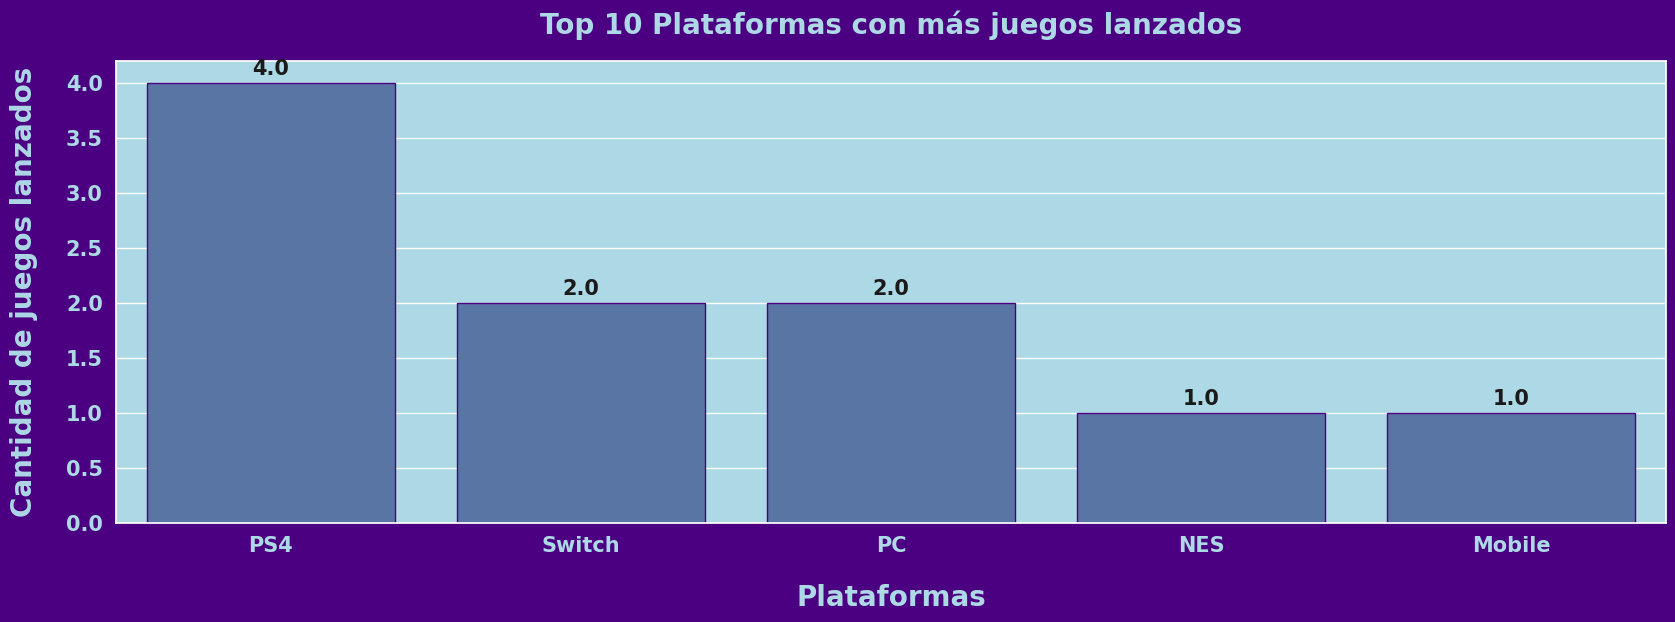

In [15]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(x=total_plataformas_lanzadas.index, y=total_plataformas_lanzadas.values, edgecolor='indigo')
plt.title('Top 10 Plataformas con más juegos lanzados', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Plataformas', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Cantidad de juegos lanzados', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

In [16]:
genero_mas_populares = datos['Género'].value_counts()
genero_mas_populares

,count
Género,
Shooter,2
Action-Adventure,2
Platform,1
Sports,1
Sandbox,1
RPG,1
Augmented Reality,1
Simulation,1


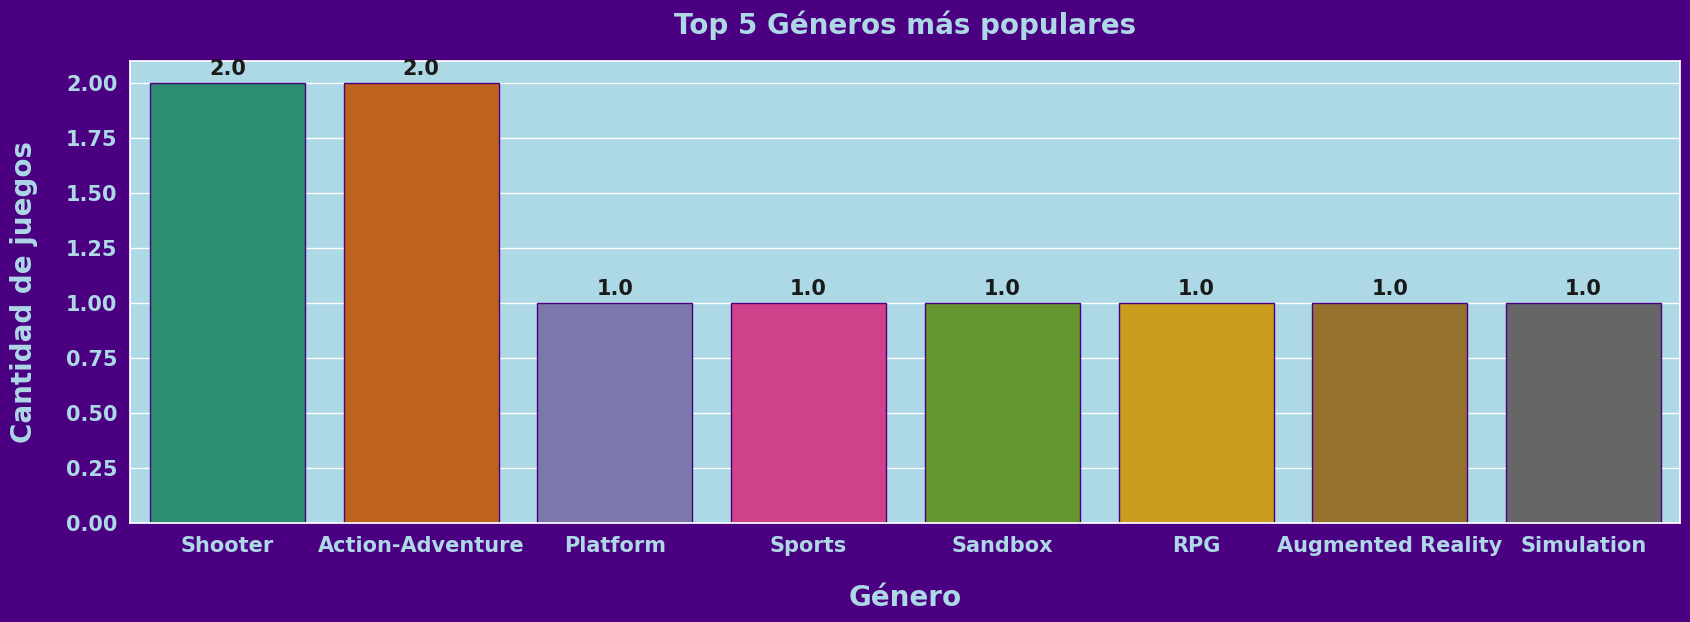

In [17]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))

# Convert the Series to a DataFrame for Seaborn
genero_mas_populares_df = genero_mas_populares.reset_index()
# Rename columns for clarity with Seaborn syntax
genero_mas_populares_df.columns = ['Género', 'Cantidad']

# Use the DataFrame as the data source for barplot
ax = sns.barplot(data=genero_mas_populares_df, x='Género', y='Cantidad', edgecolor='indigo', hue='Género', palette='Dark2')

plt.title('Top 5 Géneros más populares', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Género', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Cantidad de juegos', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

In [18]:
datos

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017-01-01,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020-01-01,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011-01-01,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015-01-01,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016-01-01,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016-01-01,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013-01-01,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020-01-01,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [19]:
cinco_generos_por_ventas = datos[['Género','Ventas_Global']].sort_values(by='Ventas_Global', ascending=False).head(6).reset_index(drop=True)
cinco_generos_por_ventas

,Género,Ventas_Global
0,Sandbox,16.42
1,Action-Adventure,16.21
2,Simulation,11.36
3,Action-Adventure,10.80
4,Platform,8.22
5,Sports,8.22


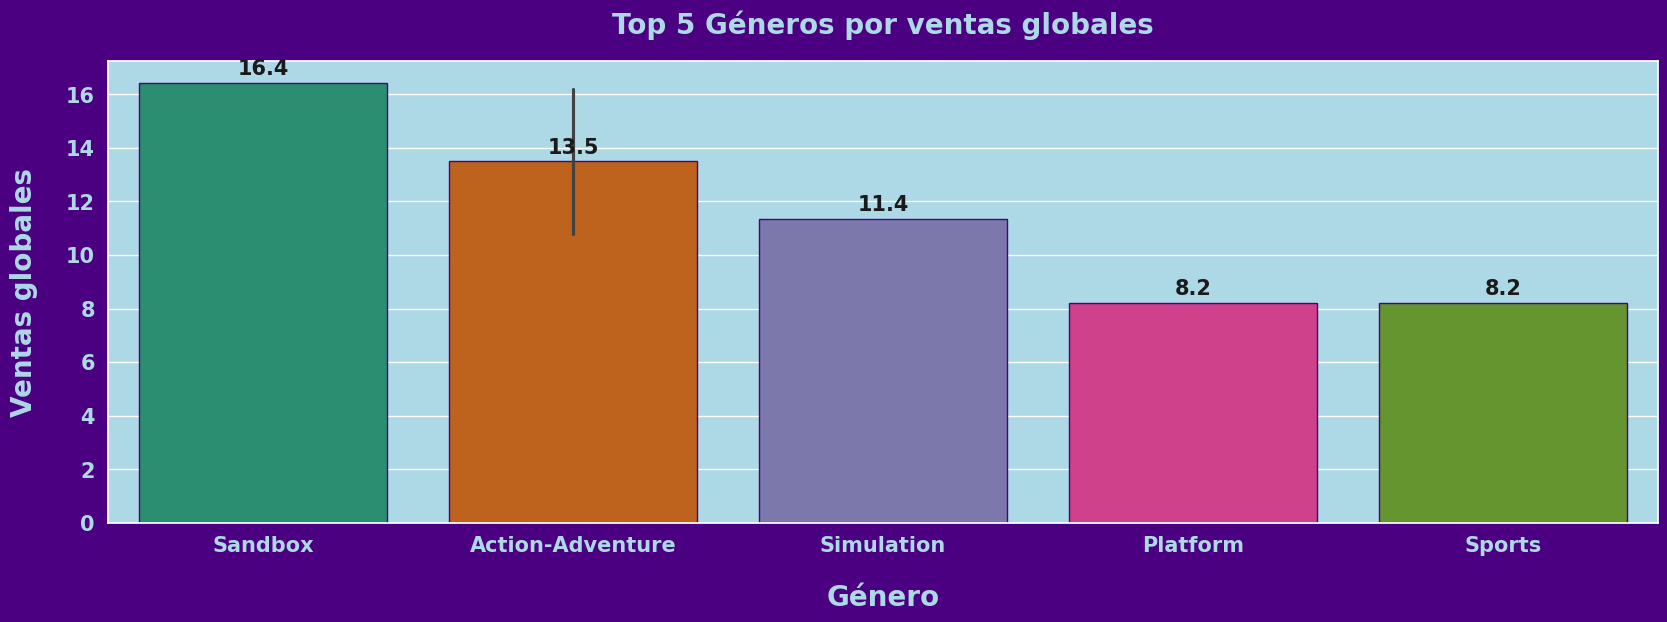

In [20]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(data=cinco_generos_por_ventas, x='Género', y='Ventas_Global', edgecolor='indigo', hue='Género', palette='Dark2')
plt.title('Top 5 Géneros por ventas globales', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Género', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Ventas globales', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

In [21]:
cinco_generos_por_ventas

,Género,Ventas_Global
0,Sandbox,16.42
1,Action-Adventure,16.21
2,Simulation,11.36
3,Action-Adventure,10.80
4,Platform,8.22
5,Sports,8.22


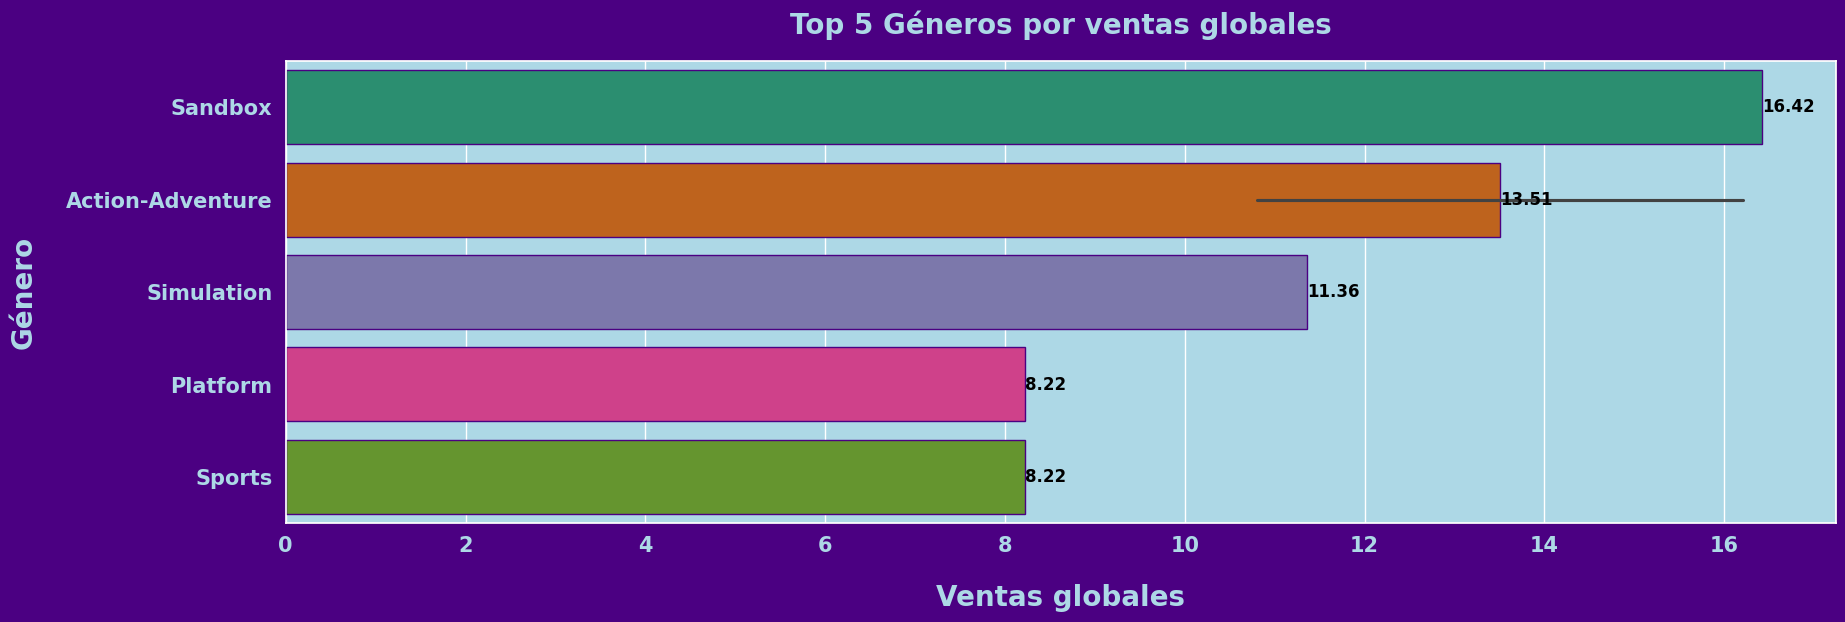

In [22]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(data=cinco_generos_por_ventas, x='Ventas_Global', y='Género', edgecolor='indigo', hue='Género', palette='Dark2')
plt.title('Top 5 Géneros por ventas globales', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Ventas globales', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Género', color='lightblue', size=20, weight='bold', labelpad=20)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color='black', fontsize=12, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

**3. Análisis de ventas:**
* Calcular las ventas totales por región y compararlas.
* Encontrar el videojuego más vendido de cada género.
* Analizar las tendencias de ventas de los videojuegos a lo largo de los años.

In [23]:
datos

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017-01-01,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020-01-01,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011-01-01,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015-01-01,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016-01-01,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016-01-01,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013-01-01,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020-01-01,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [24]:
ventas_total_por_region = datos[['Ventas_NA','Ventas_EU','Ventas_JP','Ventas_Otros','Ventas_Global']].sum()
ventas_total_por_region

,0
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


In [25]:
ventas_total_por_region.rename_axis('Región_venta_total',inplace=True)
ventas_total_por_region

,0
Región_venta_total,
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


In [26]:
ventas_total_por_region = ventas_total_por_region.to_frame()
ventas_total_por_region

,0
Región_venta_total,
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


In [27]:
ventas_total_por_region.rename(columns={0:'Ventas_Totales'},inplace=True)
ventas_total_por_region

,Ventas_Totales
Región_venta_total,
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


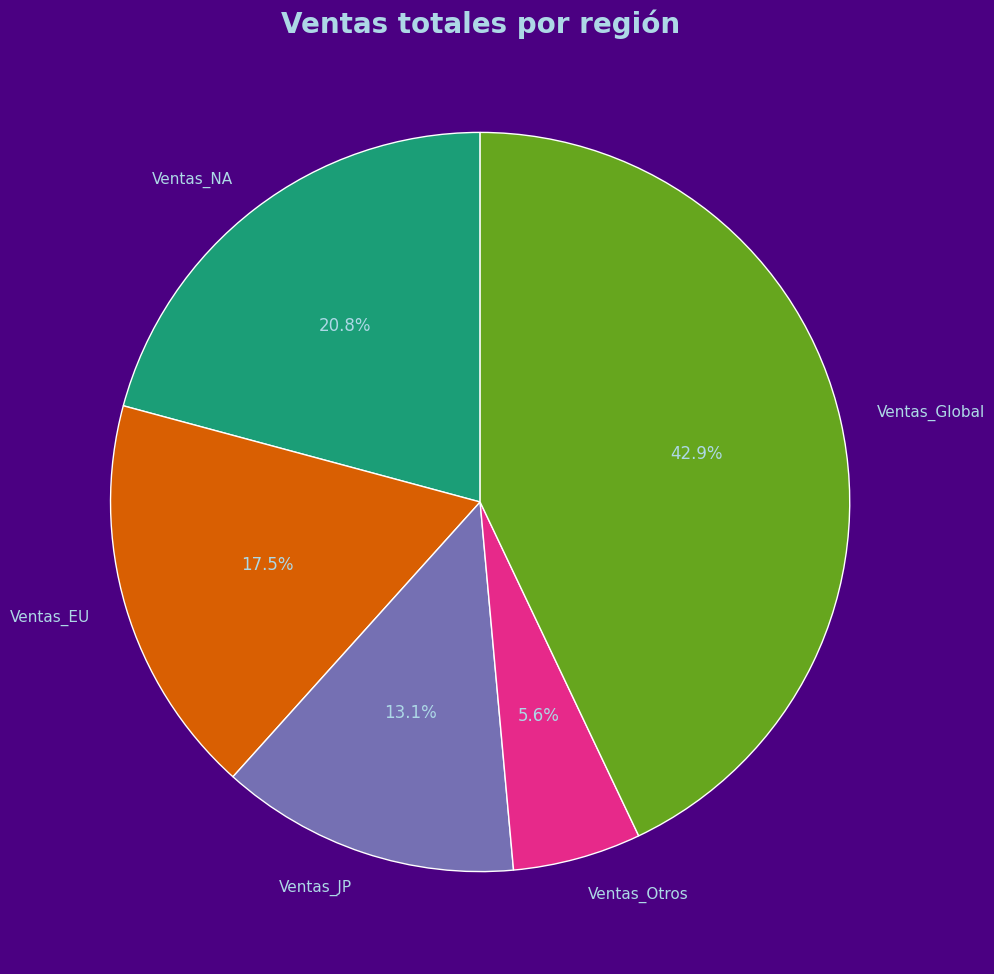

In [28]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(30,12))
ventas_data = ventas_total_por_region.values.flatten() # Convert to 1D array
plt.pie(ventas_data, # Use the 1D array here
        labels=ventas_total_por_region.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Dark2'),textprops={'color':'lightblue'})
plt.title('Ventas totales por región', color='lightblue', size=20, weight='bold', pad=5)
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

In [29]:
datos

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017-01-01,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020-01-01,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011-01-01,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015-01-01,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016-01-01,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016-01-01,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013-01-01,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020-01-01,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [30]:
juegos_mas_vendidos = datos.groupby('Género')['Ventas_Global'].idxmax()
# Obtener los nombres de los juegos y sus géneros
resultados = datos.loc[juegos_mas_vendidos][['Género','Nombre','Ventas_Global']].sort_values(by='Ventas_Global', ascending=False)

resultados

,Género,Nombre,Ventas_Global
4,Sandbox,Minecraft,16.42
2,Action-Adventure,The Legend of Zelda: Breath of the Wild,16.21
9,Simulation,Animal Crossing: New Horizons,11.36
0,Platform,Super Mario Bros.,8.22
3,Sports,FIFA 21,8.22
1,Shooter,Call of Duty: Infinite Warfare,7.93
7,Augmented Reality,Pokemon Go,7.29
5,RPG,The Witcher 3: Wild Hunt,6.75


In [31]:
top_5_resultados = resultados.nlargest(5, 'Ventas_Global')
top_5_resultados

,Género,Nombre,Ventas_Global
4,Sandbox,Minecraft,16.42
2,Action-Adventure,The Legend of Zelda: Breath of the Wild,16.21
9,Simulation,Animal Crossing: New Horizons,11.36
0,Platform,Super Mario Bros.,8.22
3,Sports,FIFA 21,8.22


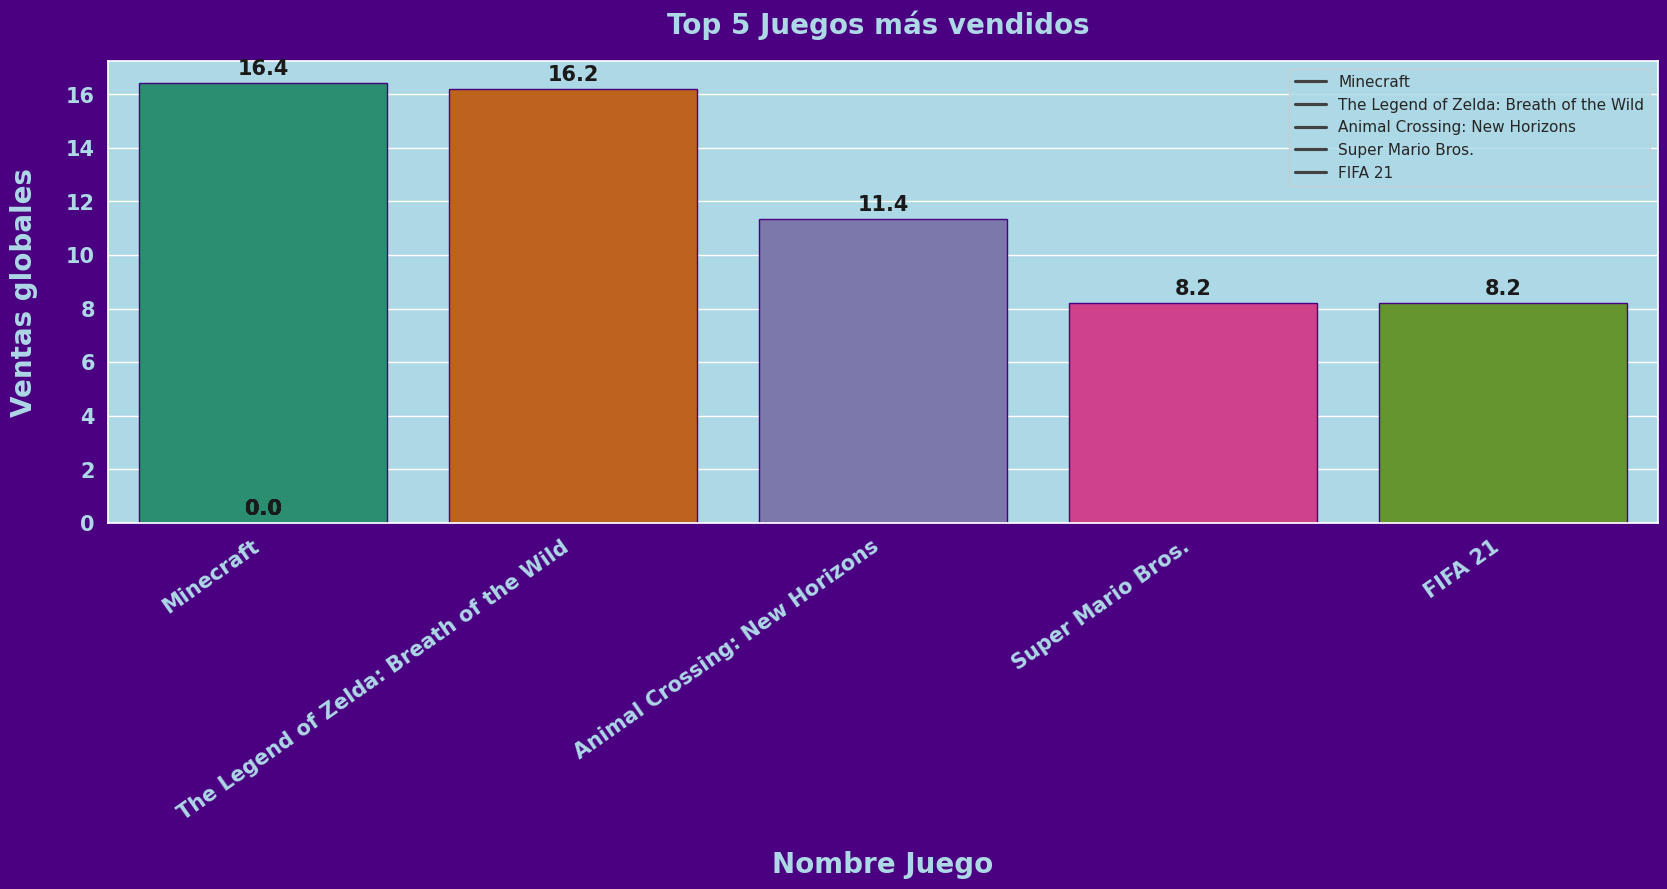

In [32]:
top_5_resultados = resultados.nlargest(5, 'Ventas_Global')
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(data=top_5_resultados, x='Nombre', y='Ventas_Global', edgecolor='indigo', hue='Género', palette='Dark2')
plt.title('Top 5 Juegos más vendidos ', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Nombre Juego', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Ventas globales', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(rotation=35, ha='right', color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.legend(top_5_resultados['Nombre'])
plt.show()

**4. Visualización de datos:**
* Crear gráficos para visualizar el número de juegos lanzados cada año.
* Graficar las ventas globales por género.
* Realizar un gráfico de barras que muestre las ventas por plataforma.

In [33]:
total_juegos_lanzados_por_año

,count
Año_de_lanzamiento,
1985-01-01,1
2011-01-01,1
2013-01-01,1
2015-01-01,1
2016-01-01,3
2017-01-01,1
2020-01-01,2


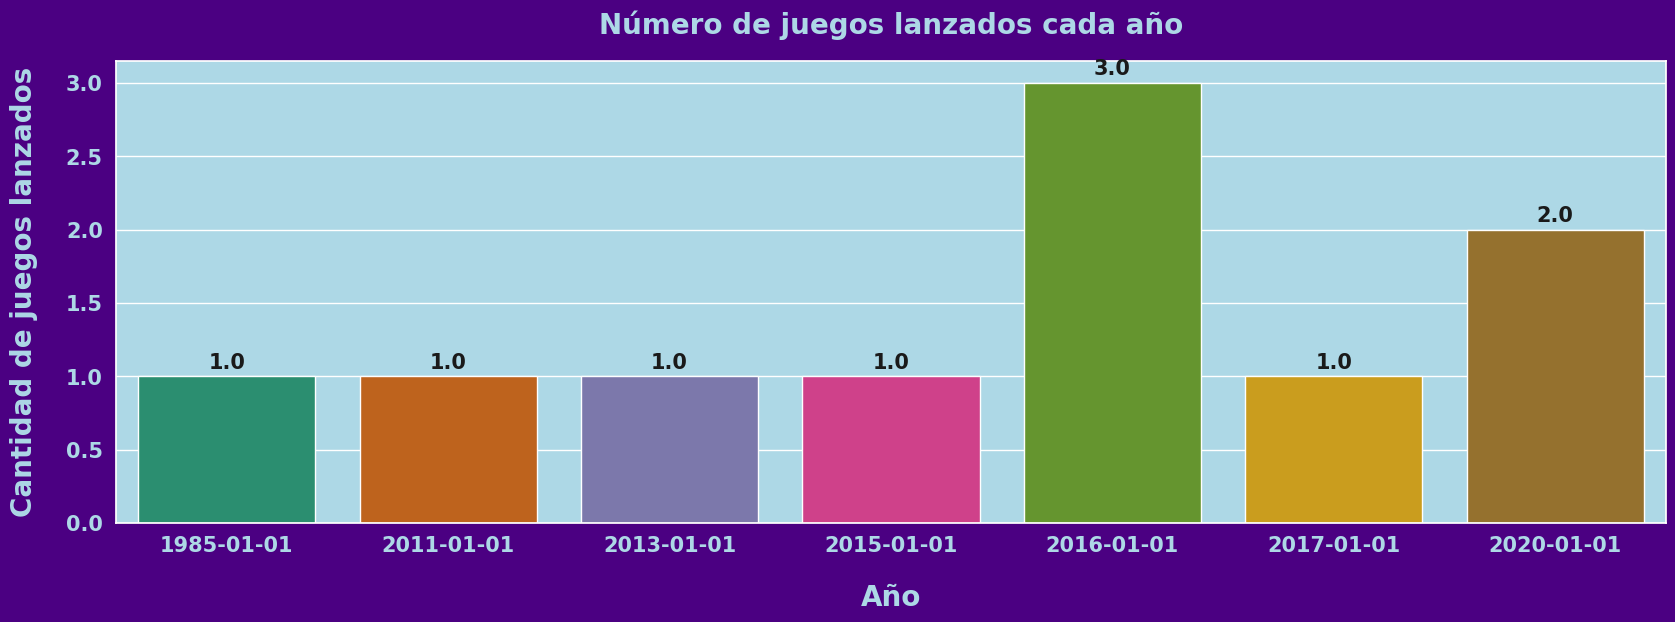

In [34]:
#Crear gráficos para visualizar el número de juegos lanzados cada año.
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(x=total_juegos_lanzados_por_año.index, y=total_juegos_lanzados_por_año.values, hue=total_juegos_lanzados_por_año.index,palette='Dark2')
plt.title('Número de juegos lanzados cada año', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Año', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Cantidad de juegos lanzados', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

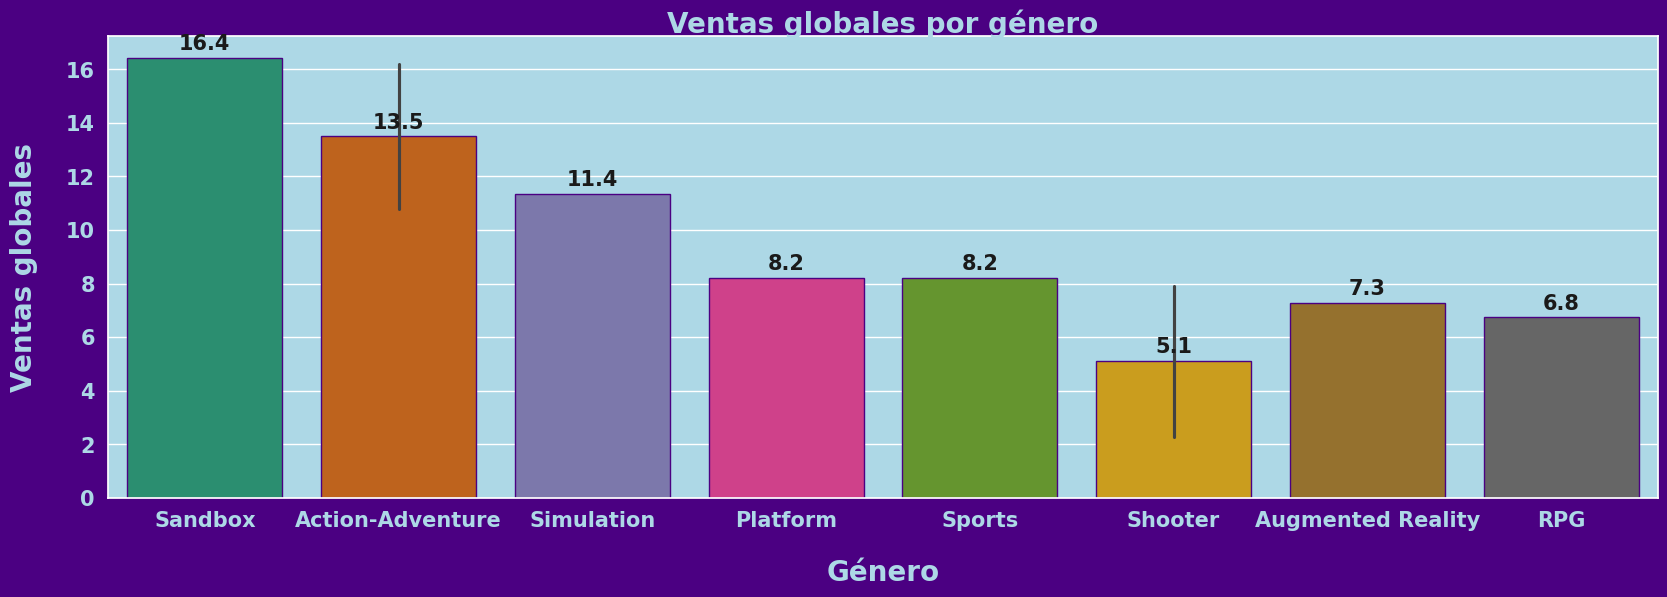

In [35]:
#Graficar las ventas globales por género.
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(data=datos.sort_values(by='Ventas_Global', ascending=False), x='Género', y='Ventas_Global', edgecolor='indigo', hue='Género', palette='Dark2')
plt.title('Ventas globales por género', color='lightblue', size=20, weight='bold', pad=2)
plt.xlabel('Género', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Ventas globales', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.show()

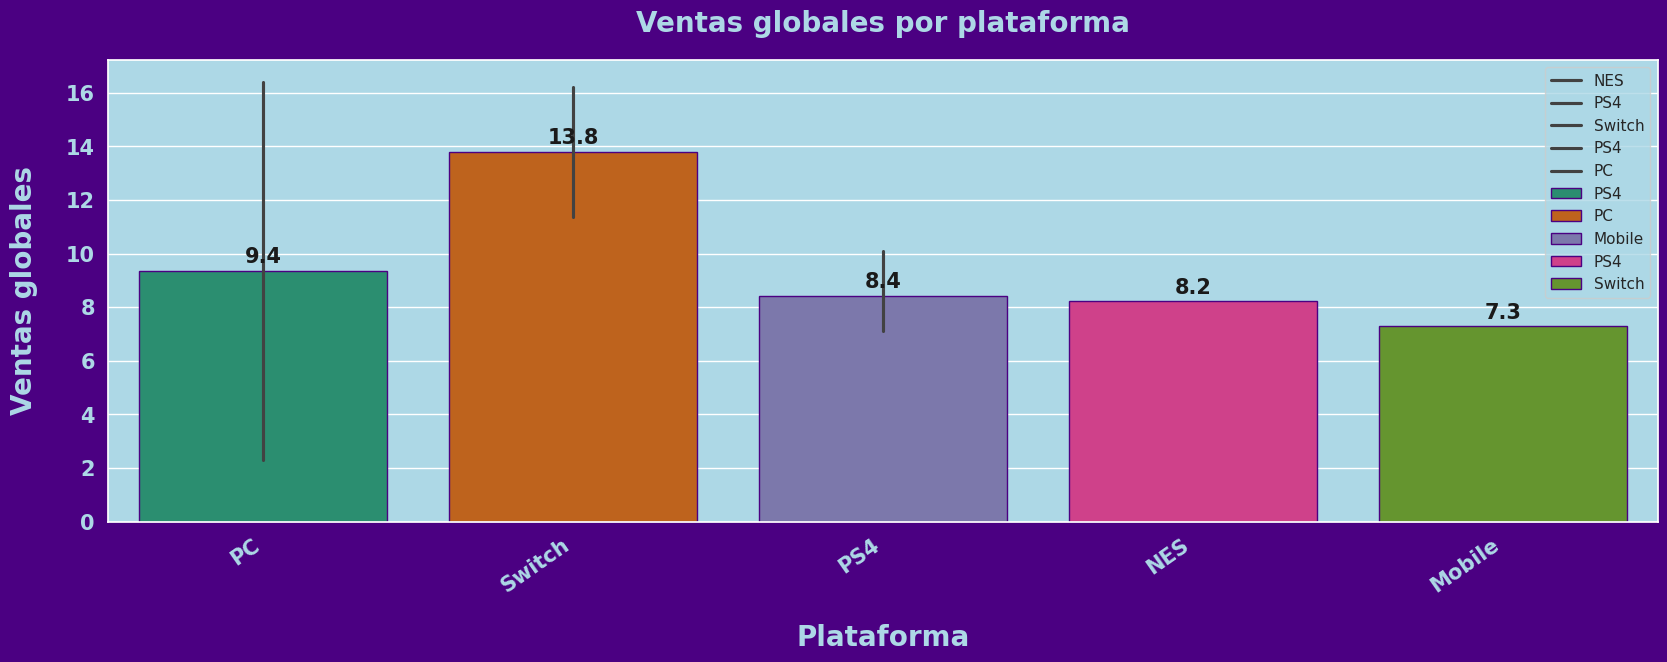

In [36]:
#Realizar un gráfico de barras que muestre las ventas por plataforma.
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.barplot(data=datos.sort_values(by='Ventas_Global', ascending=False).head(10), x='Plataforma', y='Ventas_Global', edgecolor='indigo', hue='Plataforma', palette='Dark2')
plt.title('Ventas globales por plataforma', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Plataforma', color='lightblue', size=20, weight='bold', labelpad=20)
plt.ylabel('Ventas globales', color='lightblue', size=20, weight='bold', labelpad=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                color='k', size=15, weight='bold')
plt.xticks(rotation=35, ha='right', color='lightblue', size=15, weight='bold')
plt.yticks(color='lightblue', size=15, weight='bold')
plt.legend(datos['Plataforma'])
plt.show()


**5. Insights y conclusiones:**
* Extraer al menos tres insights interesantes del análisis.
* Escribir conclusiones sobre las tendencias en la industria de videojuegos basadas en el análisis.

## Informe sobre el Gráfico de Ventas Globales por Plataforma

### Análisis Visual
El gráfico de barras presentado muestra un desglose de las ventas globales por plataforma de videojuegos. Se puede observar claramente que cada plataforma está representada por una barra de diferente color, cuya altura indica el volumen de ventas.

### Interpretación de los Datos

**Dominancia de la Plataforma Switch:**
* La plataforma Switch destaca como líder indiscutible en ventas globales, superando significativamente a sus competidores. Esto sugiere que Nintendo Switch ha logrado captar una gran base de jugadores y se ha posicionado como una opción popular para los gamers.

**Competitividad en el Segmento:**
* Las plataformas PS4, PC y NES se encuentran en un rango de ventas similar, compitiendo por el segundo, tercer y cuarto lugar. Esto indica una competencia bastante reñida en este segmento del mercado.
* La plataforma móvil, aunque presente en el top 5, muestra un volumen de ventas considerablemente menor en comparación con las consolas. Sin embargo, es importante considerar el gran número de dispositivos móviles en el mercado y el potencial de crecimiento de este segmento.

### Conclusiones y Recomendaciones

* **Foco en Nintendo Switch:** Los desarrolladores y distribuidores de videojuegos deberían considerar priorizar el desarrollo de juegos para Nintendo Switch debido a su gran base de jugadores y su alto potencial de ventas.
* **Diversificación de Plataformas:** Para maximizar el alcance y los ingresos, es recomendable desarrollar juegos multiplataforma, especialmente para las plataformas que se encuentran en el top 5.
* **Exploración del Mercado Móvil:** A pesar de que las consolas dominan el mercado, el segmento móvil ofrece un gran potencial de crecimiento. Los desarrolladores deberían explorar la creación de juegos móviles de alta calidad para aprovechar esta oportunidad.

**En resumen,** el gráfico proporciona una visión general de la distribución de las ventas globales de videojuegos entre las principales plataformas.


## Informe sobre el Gráfico de los 5 Juegos Más Vendidos

### Análisis Visual
El gráfico de barras presentado ofrece una comparación visual de las ventas globales de los cinco videojuegos más populares. Cada juego está representado por una barra de diferente color, cuya altura indica el volumen de ventas.

### Interpretación de los Datos

**Dominancia de Minecraft:**
* Minecraft se posiciona como el videojuego más vendido, con una ventaja considerable sobre sus competidores. Esto sugiere que Minecraft ha logrado mantener una base de jugadores sólida y constante a lo largo del tiempo, convirtiéndose en un fenómeno cultural.

**Popularidad de los Títulos de Nintendo:**
* Tres de los cinco juegos más vendidos pertenecen a Nintendo: The Legend of Zelda: Breath of the Wild, Animal Crossing: New Horizons y Super Mario Bros. Esto demuestra la fortaleza de la marca Nintendo y la preferencia de los jugadores por sus títulos exclusivos.

**Variedad de Géneros:**
* Los juegos presentes en el gráfico abarcan diferentes géneros, desde juegos de mundo abierto (Minecraft, The Legend of Zelda: Breath of the Wild) hasta juegos de simulación de vida (Animal Crossing: New Horizons) y deportes (FIFA 21). Esto indica que los jugadores tienen gustos variados y que los desarrolladores están ofreciendo una amplia gama de opciones.

### Conclusiones y Recomendaciones

* **Éxito de Minecraft:** El éxito sostenido de Minecraft demuestra la importancia de juegos con mecánicas de juego abiertas y que fomentan la creatividad.
* **Fuerza de Nintendo:** Nintendo continúa siendo un jugador clave en la industria de los videojuegos, gracias a sus franquicias icónicas y su capacidad para crear experiencias de juego únicas.
* **Diversidad de Géneros:** Los jugadores valoran la diversidad de géneros, por lo que los desarrolladores deben seguir explorando nuevas ideas y combinaciones de mecánicas de juego.

**En resumen,** el gráfico proporciona una visión general de los videojuegos más populares.


## Informe sobre el Gráfico de Juegos Lanzados por Año

### Análisis Visual
El gráfico de barras presentado muestra la cantidad de juegos lanzados cada año en un período específico. Cada barra representa un año y su altura indica el número de juegos lanzados durante ese año.

### Interpretación de los Datos

**Fluctuaciones en los Lanzamientos:**
* Se observa una variabilidad considerable en la cantidad de juegos lanzados cada año. Algunos años presentan un número mayor de lanzamientos, mientras que otros muestran una disminución.
* No se aprecia una tendencia clara de crecimiento o decrecimiento a lo largo del período analizado.

**Años con Mayor Cantidad de Lanzamientos:**
* El año con mayor cantidad de lanzamientos es el 2016, seguido de cerca por el 2020. Esto sugiere que en estos años hubo una mayor actividad en la industria de los videojuegos, posiblemente debido a factores como el lanzamiento de nuevas consolas, eventos importantes en la industria o cambios en las tendencias de consumo.

### Conclusiones y Recomendaciones

* **Variabilidad en la Producción:** La industria de los videojuegos presenta ciclos de lanzamientos que pueden variar de un año a otro. Esto puede estar influenciado por diversos factores, como la disponibilidad de recursos, la competencia entre desarrolladores y las preferencias de los consumidores.

**En resumen,** el gráfico proporciona una visión general de la cantidad de juegos lanzados cada año.
